In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [4]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [5]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) #* (5/3)/((10 * block_size)**0.5)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g) #* 0.01
b2 = torch.randn(27, generator=g) #* 0 
parameters = [C, W1, b1, W2, b2]


In [6]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [7]:
for p in parameters:
  p.requires_grad = True

In [ ]:
losses = []

for i in range(20000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())
  losses.append(loss.log10().item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad


2.7056496143341064
2.600588798522949
2.2367868423461914
2.847205877304077
2.532318115234375
3.1345691680908203
2.7115325927734375
2.53657603263855
2.3046419620513916
2.4930148124694824
2.7819039821624756
2.4158101081848145
1.9521185159683228
1.7771458625793457
2.3861026763916016
2.284843921661377
2.6790809631347656
2.63944673538208
3.0597970485687256
2.5323710441589355
2.4266560077667236
2.304569721221924
2.362638473510742
2.4564733505249023
2.1051876544952393
2.3323752880096436
2.824596881866455
2.411137104034424
2.0791356563568115
2.4070637226104736
2.946528196334839
2.315932273864746
2.452965259552002
2.5029828548431396
2.3286373615264893
2.7510392665863037
2.6380867958068848
2.152937412261963
2.60172963142395
3.1551754474639893
2.892496109008789
2.47003436088562
2.4438869953155518
2.28610897064209
2.3850443363189697
2.247753381729126
2.777238607406616
2.5593719482421875
2.933861494064331
2.5941193103790283
2.1549856662750244
2.6563589572906494
2.4700989723205566
2.244377374649048
2

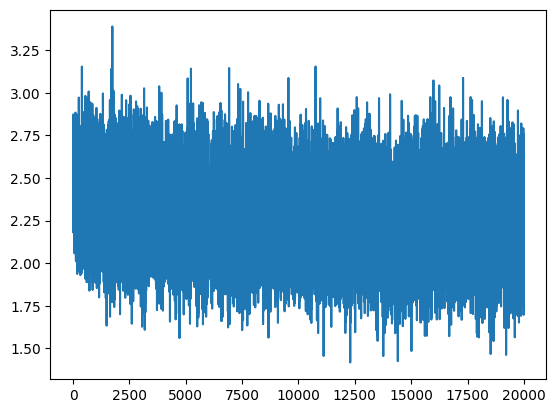

In [ ]:
plt.plot(losses)
# with smart init

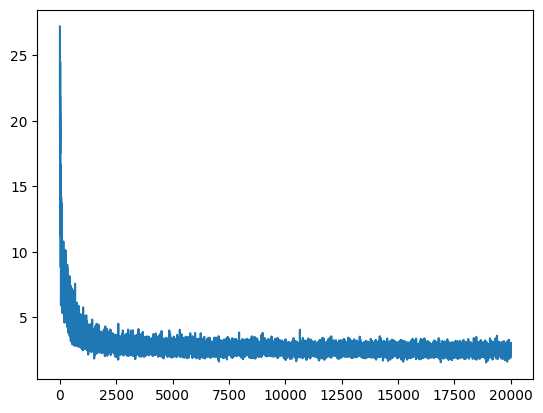

In [ ]:
plt.plot(losses)
# without smart init

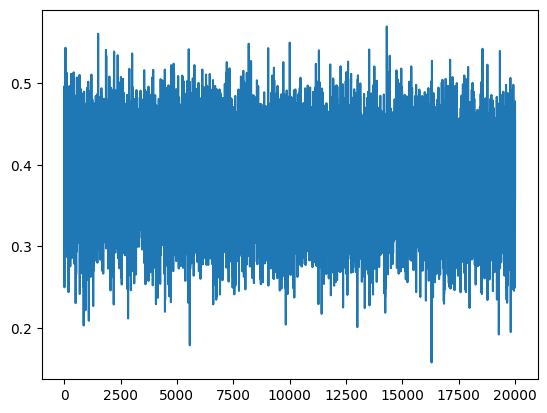

In [ ]:
plt.plot(losses)
# without smart init but log10

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) #* (5/3)/((10 * block_size)**0.5)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g) #* 0.01
b2 = torch.randn(27, generator=g) #* 0 
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
losses = []
hs = []

for i in range(20000):
  
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    hpr = emb.view(-1, 30) @ W1 + b1
    h = torch.tanh(hpr) # (32, 200)
    hs.append(h)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    print(loss.item())
    losses.append(loss.log10().item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad 
    break

24.49344253540039


(array([2344.,  184.,   88.,   71.,   77.,   46.,   66.,   59.,   68.,
          32.,   39.,   44.,   54.,   54.,   72.,   83.,   81.,  108.,
         183., 2647.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

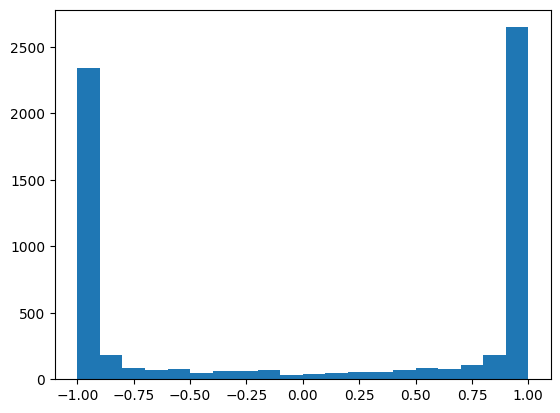

In [ ]:
plt.hist(h.view(-1).tolist(), bins=20)
# without smart init

(array([1.000e+00, 5.000e+00, 1.100e+01, 4.200e+01, 8.300e+01, 2.190e+02,
        4.140e+02, 6.940e+02, 8.640e+02, 1.125e+03, 1.002e+03, 8.120e+02,
        5.270e+02, 3.370e+02, 1.570e+02, 5.600e+01, 3.600e+01, 1.100e+01,
        3.000e+00, 1.000e+00]),
 array([-22.79552269, -20.43032103, -18.06511936, -15.6999177 ,
        -13.33471603, -10.96951437,  -8.60431271,  -6.23911104,
         -3.87390938,  -1.50870771,   0.85649395,   3.22169561,
          5.58689728,   7.95209894,  10.31730061,  12.68250227,
         15.04770393,  17.4129056 ,  19.77810726,  22.14330893,
         24.50851059]),
 <BarContainer object of 20 artists>)

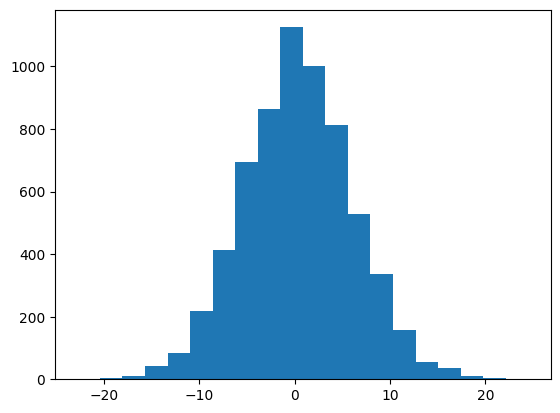

In [ ]:
plt.hist(hpr.view(-1).tolist(), bins=20)
# without smart init

(array([1327.,  367.,  243.,  215.,  194.,  122.,  119.,  138.,  139.,
         145.,  116.,  134.,  155.,  204.,  158.,  163.,  185.,  273.,
         430., 1573.]),
 array([-9.99999762e-01, -8.99999776e-01, -7.99999791e-01, -6.99999806e-01,
        -5.99999821e-01, -4.99999836e-01, -3.99999851e-01, -2.99999866e-01,
        -1.99999881e-01, -9.99998957e-02,  8.94069672e-08,  1.00000075e-01,
         2.00000060e-01,  3.00000045e-01,  4.00000030e-01,  5.00000015e-01,
         6.00000000e-01,  6.99999985e-01,  7.99999970e-01,  8.99999955e-01,
         9.99999940e-01]),
 <BarContainer object of 20 artists>)

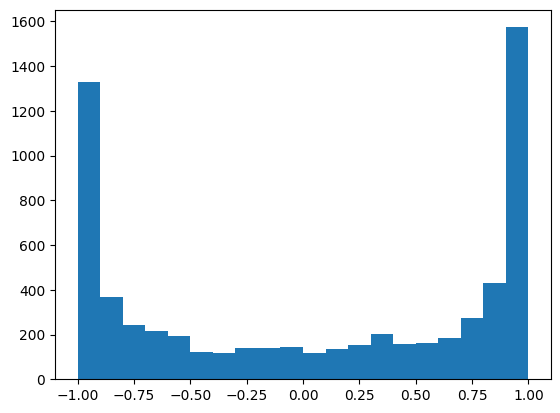

In [ ]:
plt.hist(hs[0].view(-1).tolist(), bins=20)
# with smart init

(array([  5.,   7.,  28.,  78., 158., 259., 516., 682., 861., 947., 921.,
        740., 517., 337., 201.,  82.,  41.,  12.,   4.,   4.]),
 array([-6.79568672, -6.08035519, -5.36502366, -4.64969213, -3.9343606 ,
        -3.21902907, -2.50369754, -1.78836601, -1.07303448, -0.35770295,
         0.35762858,  1.07296011,  1.78829165,  2.50362318,  3.21895471,
         3.93428624,  4.64961777,  5.3649493 ,  6.08028083,  6.79561236,
         7.51094389]),
 <BarContainer object of 20 artists>)

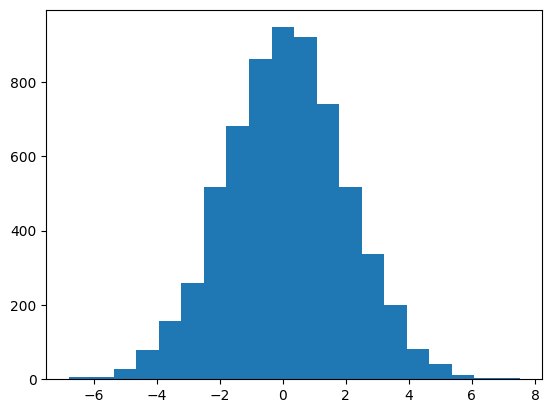

In [ ]:
plt.hist(hpr.view(-1).tolist(), bins=20)
# with smart init

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) * (5/3)/((10 * block_size)**0.5)
b1 = torch.randn(200, generator=g) * 0.01
W2 = torch.randn((200, 27), generator=g) * 0.01
b2 = torch.randn(27, generator=g) * 0 
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

losses = []
hs = []

for i in range(20000):
  
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    hpr = emb.view(-1, 30) @ W1 + b1
    h = torch.tanh(hpr) # (32, 200)
    hs.append(h)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    print(loss.item())
    losses.append(loss.log10().item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad 
    break

3.2983527183532715


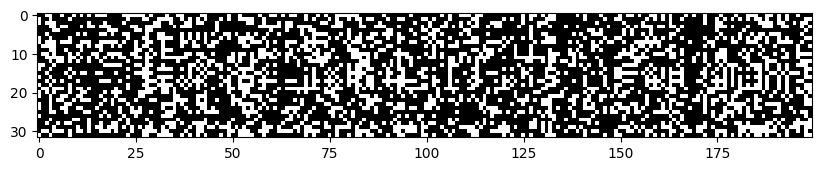

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(h.abs()>0.9, cmap="gray", interpolation="nearest")
# white if it true 
# bacground gredient will be destroid 
# whole column white = dead neuron, becous gradient = 0 dosnt change weight 

30.300691604614258


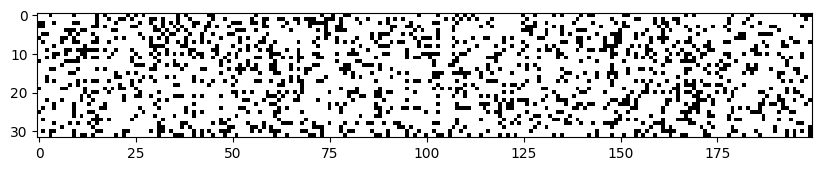

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) #* (5/3)/((10 * block_size)**0.5)
b1 = torch.randn(200, generator=g) #* 0.01
W2 = torch.randn((200, 27), generator=g) #* 0.01
b2 = torch.randn(27, generator=g) #* 0 
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

losses = []
hs = []

for i in range(20000):
  
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    hpr = emb.view(-1, 30) @ W1 + b1
    h = torch.tanh(hpr) # (32, 200)
    hs.append(h)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    print(loss.item())
    losses.append(loss.log10().item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad 
    break

plt.figure(figsize=(10,10))
plt.imshow(h.abs()>0.9, cmap="gray", interpolation="nearest")


In [ ]:
# we want all neurons to have very simmilar activation 

In [ ]:
# batch normalization 
# we wont hpre be rougly gausian
# normalization to be gausian becous 
# if its too small - tanh is unactive 
# if its to large - tanh is saturated(nasycony), and gradients didnt flow 

In [ ]:
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, n_hidden), generator=g) * (5/3)/((10 * block_size)**0.5)
# b1 = torch.randn(n_hidden, generator=g) * 0.01  we dont ned baises befor bach norm layer 
W2 = torch.randn((n_hidden, 27), generator=g) * 0.01
b2 = torch.randn(27, generator=g) * 0 

bngin = torch.ones((1,n_hidden))
bnbias = torch.zeros((1, n_hidden))
# parms not use in optymalization
bnmean_running = torch.ones((1,n_hidden))
bnstd_running = torch.zeros((1, n_hidden))

parameters = [C, W1, W2, b2, bngin, bnbias]

for p in parameters:
  p.requires_grad = True

losses = []
hs = []

for i in range(20000):
  
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    hpr = emb.view(-1, 30) @ W1 #+ b1

    # batch normallization 
    # every singule neuron now,  firerate will be exaxly unit gaussian on 
    # it 32 exmple (size of batch) 
    # but we wont it to be gausian only in intialization 
    # and after move it around, that why we add scale and shift 
    meani = hpr.mean(0, keepdim=True)
    stdi = hpr.std(0, keepdim=True)
    hpr = bngin * (hpr-meani)/stdi + bnbias
    # that becous no one like to count this after whole treining 
    # so you estymate it during training (beside ptymalization proces) - no graddnien decent
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * meani
        bnstd_running = 0.999 * bnstd_running + 0.001 * stdi
    
    
    h = torch.tanh(hpr) # (32, 200)
    hs.append(h)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    print(loss.item())
    losses.append(loss.log10().item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad 
    # break

3.3033502101898193
3.240952253341675
3.265693187713623
3.318340301513672
3.1989169120788574
3.2037463188171387
3.108001232147217
3.243195056915283
3.1394855976104736
3.1810176372528076
3.104501247406006
3.1617493629455566
3.063490629196167
3.0021471977233887
3.1247401237487793
3.063645839691162
2.894624710083008
2.9138011932373047
3.0179524421691895
3.031357526779175
2.973026990890503
2.971134901046753
2.836886405944824
3.115114450454712
2.7736876010894775
3.2522435188293457
3.1573472023010254
2.8981800079345703
2.9789960384368896
3.188312530517578
3.183364152908325
3.002800464630127
3.1260955333709717
3.0161352157592773
2.9352400302886963
3.093036651611328
2.9500038623809814
2.941732406616211
2.9053547382354736
2.9507648944854736
2.7781810760498047
2.83077335357666
2.772231340408325
2.712442636489868
2.568650245666504
2.8732964992523193
2.8687589168548584
2.8104124069213867
2.844802141189575
2.962946653366089
2.757028579711914
2.9928860664367676
2.8350038528442383
3.0297977924346924
2

In [ ]:
# secend evect of batch norm is regularyzation , i dont know why

# but how to predict now only one exmple with batch norm layer (how to count std and mean? 
# we can count mean and std on all trening set and make them const 
with torch.no_grad():
    emb = C[Xtr]
    hpr = emb.view(-1, 30) @ W1 #+ b1
    bnmean = hpr.mean(0, keepdim=True)
    bnstd = hpr.std(0, keepdim=True)
# no one whant to do it becous hes lazy 



In [ ]:
bnmean_running - bnmean
# mean estymaete during training is very similar to mean counted on whole traaining set 
# but people are lazy so the only estymate it during training 
# the same std 

tensor([[ 0.0582, -0.0273, -0.0073, -0.0406,  0.0045, -0.0235, -0.0173, -0.0428,
          0.0173, -0.0016,  0.0148,  0.0459,  0.0275, -0.0488,  0.0280, -0.0235,
          0.0174,  0.0074,  0.0031, -0.0298,  0.0017, -0.0106,  0.0053,  0.0080,
          0.0089,  0.0042,  0.0022, -0.0299,  0.0158, -0.0266,  0.0250,  0.0495,
         -0.0383, -0.0274, -0.0397,  0.0117,  0.0067,  0.0259, -0.0335, -0.0494,
          0.0359,  0.0140, -0.0372, -0.0108, -0.0103,  0.0507,  0.0118,  0.0200,
          0.0123, -0.0470, -0.0066, -0.0277, -0.0384, -0.0380, -0.0096,  0.0572,
         -0.0382, -0.0002,  0.0122,  0.0288,  0.0042,  0.0101, -0.0173, -0.0131,
         -0.0228, -0.0414,  0.0151, -0.0003, -0.0075,  0.0170,  0.0129,  0.0635,
          0.0151,  0.0069,  0.0031, -0.0151, -0.0093,  0.0173, -0.0300,  0.0246,
          0.0117, -0.0438, -0.0381, -0.0206, -0.0275, -0.0246,  0.0425,  0.0525,
         -0.0316, -0.0095,  0.0206, -0.0137, -0.0464, -0.0057,  0.0109,  0.0303,
         -0.0458,  0.0215,  

In [ ]:
@torch.no_grad()
def split_loss(split):
    X, Y ={
        "trening": (Xtr, Ytr),
        "validation": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]

    emb = C[X]
    hpr = emb.view(-1, 30) @ W1 #+ b1

    # hpr = bngin * (hpr-hpr.mean(0, keepdim=True))/hpr.std(0, keepdim=True) + bnbias
    # hpr = bngin * (hpr-bnmean)/bnstd + bnbias
    hpr = bngin * (hpr-bnmean_running)/bnstd_running + bnbias
    
    h = torch.tanh(hpr) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Y)
    print(f'{split} = {loss.item()}')

split_loss("test")
    

test = 2.2464160919189453


In [ ]:
# epsilon is to not division by zero 
# we dont ned baises befor bach norm layer 
b1 # zeros, no learn 

tensor([-0.0207, -0.0099,  0.0003,  0.0197, -0.0015,  0.0098, -0.0035, -0.0101,
        -0.0088,  0.0080,  0.0122, -0.0071,  0.0014,  0.0229,  0.0112, -0.0018,
        -0.0015, -0.0115, -0.0141,  0.0119, -0.0042,  0.0121,  0.0065, -0.0034,
         0.0127,  0.0148,  0.0112, -0.0012,  0.0081, -0.0074,  0.0021,  0.0023,
         0.0043, -0.0155, -0.0095, -0.0091, -0.0037,  0.0014,  0.0106,  0.0159,
        -0.0005, -0.0042,  0.0130, -0.0185, -0.0035, -0.0043,  0.0004, -0.0102,
         0.0087, -0.0128, -0.0037, -0.0092, -0.0096,  0.0041, -0.0098, -0.0024,
         0.0121,  0.0129,  0.0072,  0.0168,  0.0004, -0.0092, -0.0056, -0.0070,
         0.0025, -0.0053,  0.0069, -0.0028,  0.0068, -0.0011,  0.0105, -0.0134,
         0.0012, -0.0053,  0.0008, -0.0110,  0.0017, -0.0045,  0.0003, -0.0020,
         0.0127,  0.0009, -0.0170, -0.0004,  0.0028, -0.0026,  0.0040, -0.0020,
        -0.0129,  0.0062,  0.0213,  0.0098,  0.0029, -0.0025,  0.0096, -0.0068,
        -0.0071, -0.0086,  0.0024, -0.02

we use batch norm to control statistic in nn, 
we use it usual after leayer that have multiplic for ex. convoltion linear
bach norms have internaly parms bngin, bnbias use by optymalization 
also have two buffers mean i std, not learn by optymalization by junky update 

Really its calculate men and std of activations feeding in bach layers over that batch 
then its centring that batch to be unit gaussian 
and then its offsceting and scelling it by learn bias and gain 
and truck std and mean use later in interference 

You use higly sliier momentum n batch norm when you have big batch 
bu we habe chat size = 32 so we use smaller than defoult 0.1 use by pytorch
we use 0.001 

affine always true

truck running state - if you estymate mean and std after optymalization on whole trainig set 

hocky stik loss - the reson for that 


# Pytorch.nn at home 

In [6]:
# torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

class Linear:
    def __init__(self, in_fetures, out_fetures, bias=True): #fanin fanout
        self.weight = torch.randn((in_fetures, out_fetures), generator=g) * 1/((in_fetures*out_fetures)**0.5)
        self.bias = torch.randn(n_hidden, generator=g) * 0.01 if bias else None

    def __call__(self, x):
        self.out = x @ self.weight
        if self.bias is not None: self.out += self.bias
        return self.out
    
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:
    def __init__(self, in_features, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.learning_mode = True
        self.momentum = momentum
        
        self.gamma = torch.ones((1, in_features))
        self.beta = torch.zeros((1, in_features))        
        
        self.bnmean_running = torch.ones((1, in_features))
        self.bnvar_running = torch.zeros((1, in_features))

    def __call__(self, x):
        if self.learning_mode:
            meani = x.mean(0, keepdim=True)
            vari = x.var(0, keepdim=True)
            self.out = self.gamma * (x-meani)/torch.sqrt(vari + self.eps) + self.beta
            with torch.no_grad():
                self.bnmean_running = (1-self.momentum) * self.bnmean_running + self.momentum * meani
                self.bnvar_running = (1-self.momentum) * self.bnvar_running + self.momentum * vari
        
        else: 
            self.out = self.gamma * (x-self.bnmean_running)/torch.sqrt(self.bnvar_running + self.eps) + self.beta

        return self.out
    
    def parameters(self):
        return [self.gamma, self.beta]
            
class Tanh:
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out 
    def parameters(self):
        return []


In [7]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 1.0 #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True


47024


In [56]:
max_steps = 200000
batch_size = 32
ud = []

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    emb = C[Xtr[ix]]
    
    x = emb.view((emb.shape[0], -1))
    for layer in layers:
        x = layer(x)
    
    loss = F.cross_entropy(x, Ytr[ix])
    if i%10000==0:
        print(f'{loss=}')
    
    for layer in layers:
        layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
    for p in parameters:
        p.grad = None

    loss.backward()

    lr = -0.1 if i <150000 else -0.01
    for p in parameters:
        p.data += lr * p.grad 
    
    with torch.no_grad():
        ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])

    
    break
    # if i >= 1000:
    #     break # AFTER_DEBUG: would take out obviously to run full optimization


loss=tensor(2.5467, grad_fn=<NllLossBackward0>)


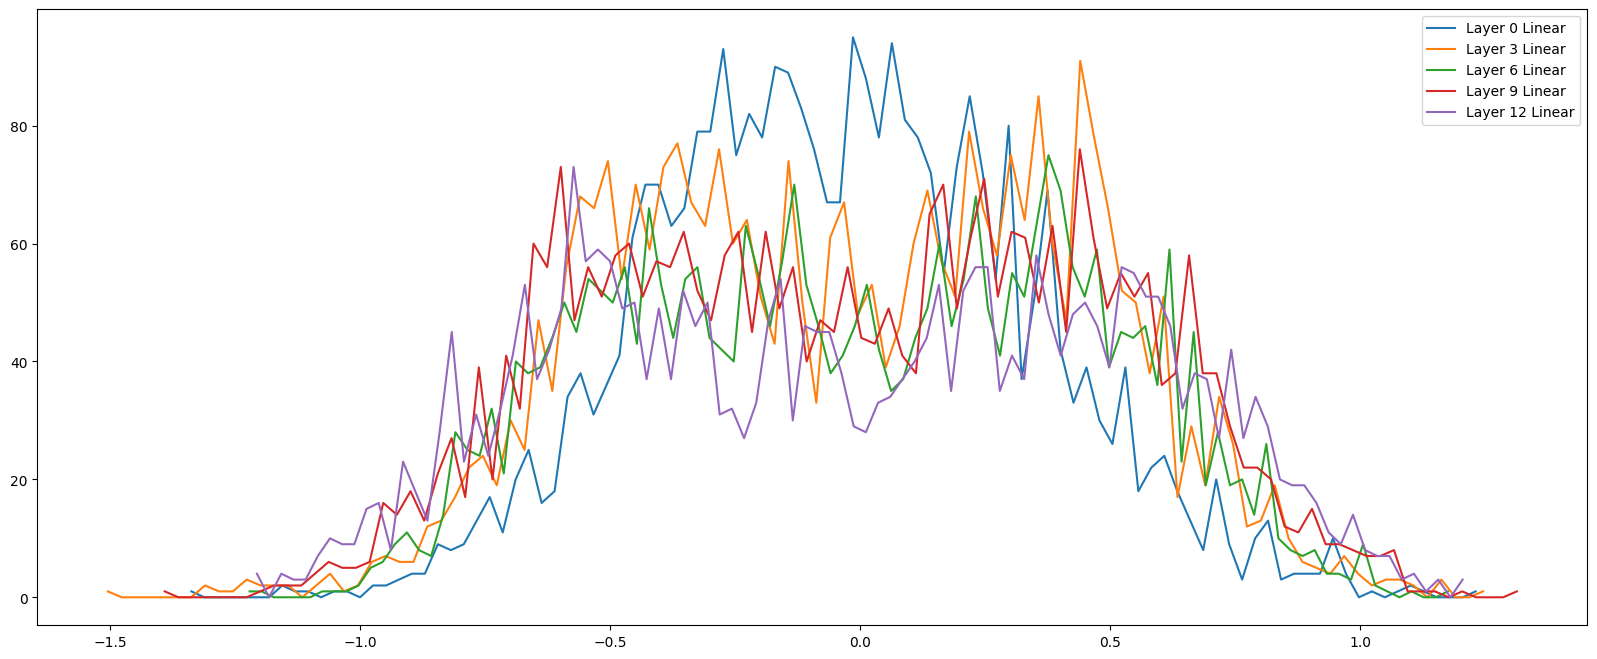

In [48]:
plt.figure(figsize=(20,8))
labels = []
for i, layer in enumerate(layers[:-2]):
    if isinstance(layer, Linear):
        hy, hx = torch.histogram(layer.out)
        plt.plot(hx[:-1].detach(), hy.detach())
        labels.append(f'Layer {i} {layer.__class__.__name__}')

plt.legend(labels)


layer 2 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 5 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 8 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 11 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 14 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%


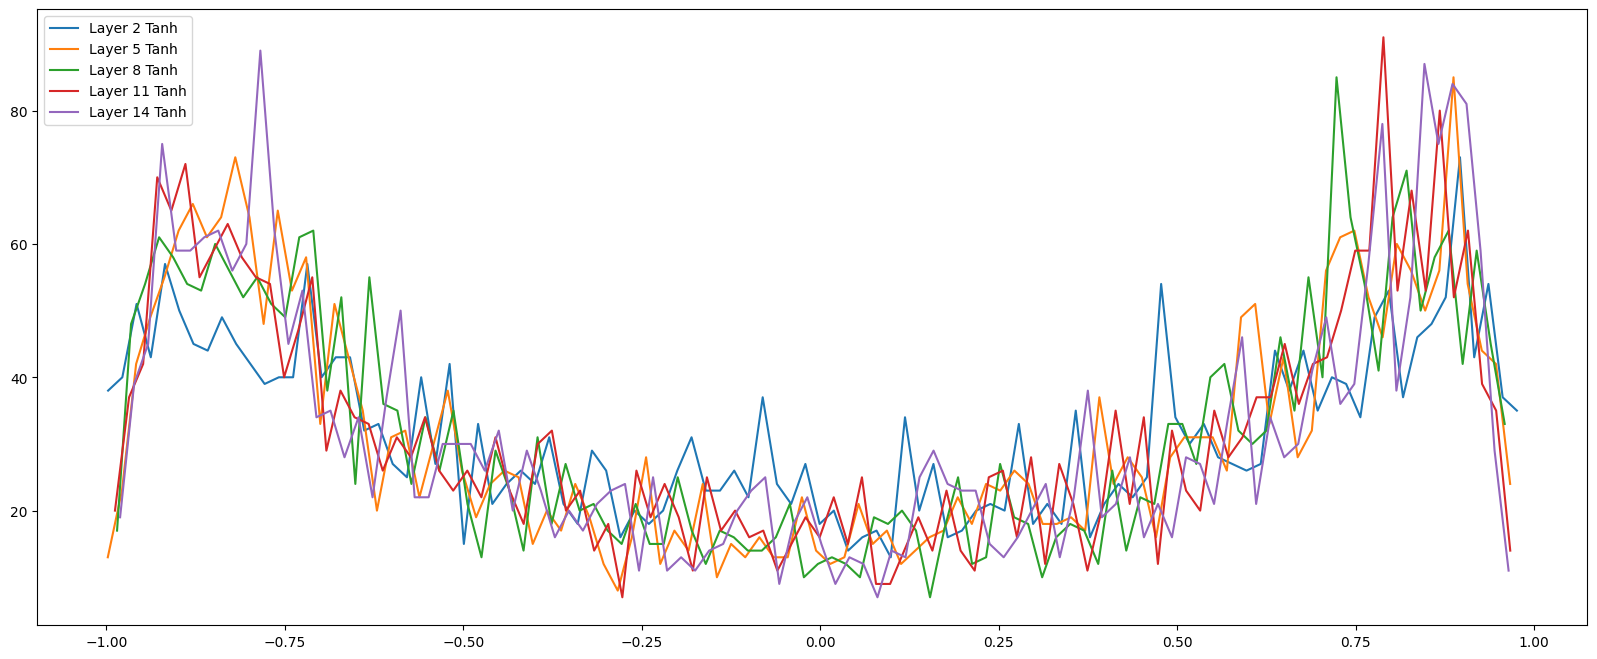

In [57]:
plt.figure(figsize=(20,8))
labels = []
for i, layer in enumerate(layers[:-2]):
    if isinstance(layer, Tanh):
        hy, hx = torch.histogram(layer.out)
        print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
        plt.plot(hx[:-1].detach(), hy.detach())
        labels.append(f'Layer {i} {layer.__class__.__name__}')

plt.legend(labels)


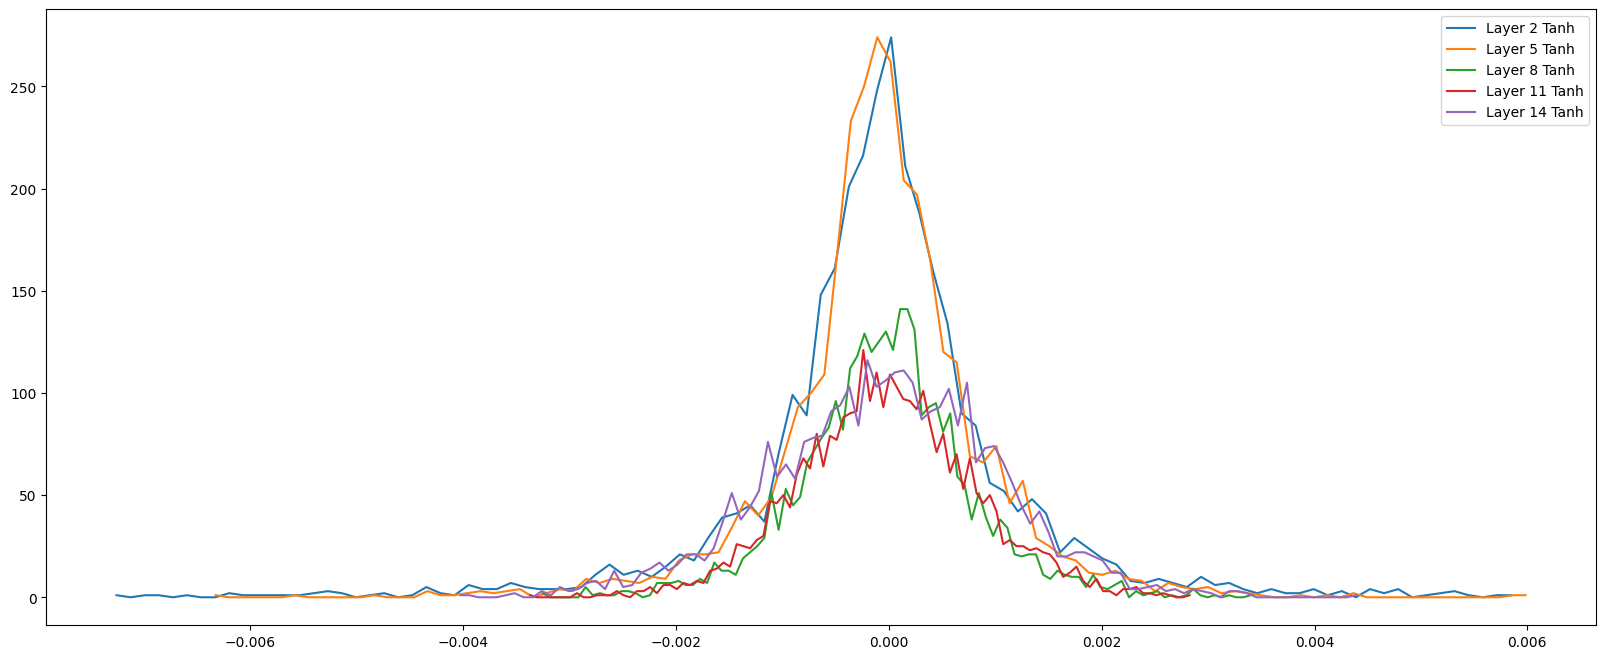

In [50]:
plt.figure(figsize=(20,8))
labels = []
for i, layer in enumerate(layers[:-2]):
    if isinstance(layer, Tanh):
        hy, hx = torch.histogram(layer.out.grad)
        plt.plot(hx[:-1].detach(), hy.detach())
        labels.append(f'Layer {i} {layer.__class__.__name__}')

plt.legend(labels)


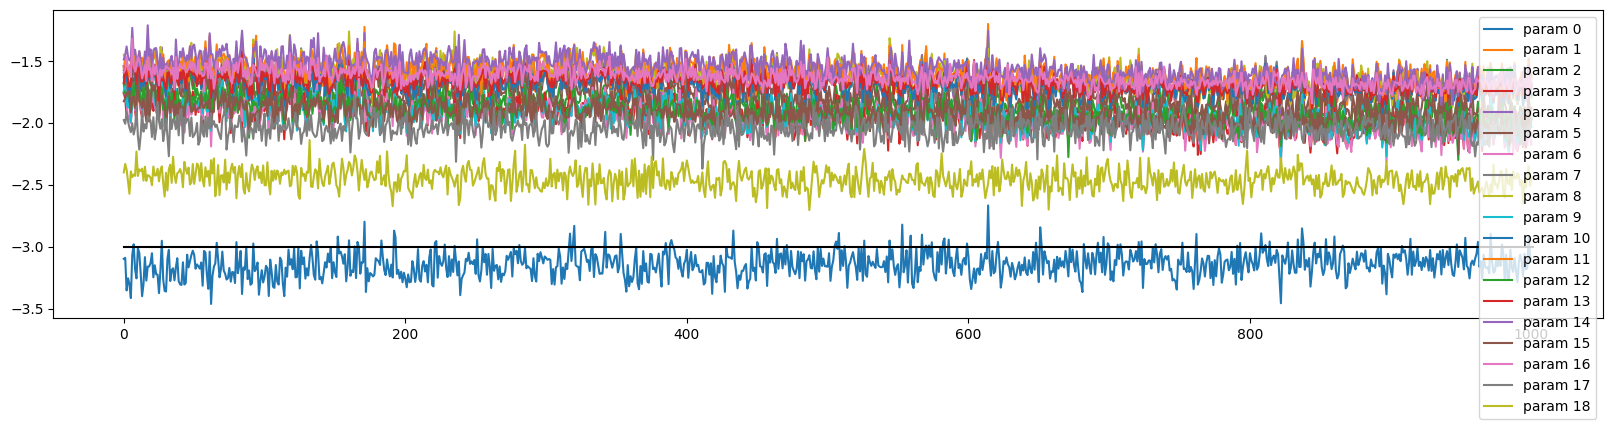

In [51]:
plt.figure(figsize=(20, 4))

legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);


In [52]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')


train 2.4205403327941895
val 2.415339708328247


In [53]:
# BatchNorm forward pass as a widget

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats
import numpy as np

def normshow(x0):
  
  g = torch.Generator().manual_seed(2147483647+1)
  x = torch.randn(5, generator=g) * 5
  x[0] = x0 # override the 0th example with the slider
  mu = x.mean()
  sig = x.std()
  y = (x - mu)/sig

  plt.figure(figsize=(10, 5))
  # plot 0
  plt.plot([-6,6], [0,0], 'k')
  # plot the mean and std
  xx = np.linspace(-6, 6, 100)
  plt.plot(xx, stats.norm.pdf(xx, mu, sig), 'b')
  xx = np.linspace(-6, 6, 100)
  plt.plot(xx, stats.norm.pdf(xx, 0, 1), 'r')
  # plot little lines connecting input and output
  for i in range(len(x)):
    plt.plot([x[i],y[i]], [1, 0], 'k', alpha=0.2)
  # plot the input and output values
  plt.scatter(x.data, torch.ones_like(x).data, c='b', s=100)
  plt.scatter(y.data, torch.zeros_like(y).data, c='r', s=100)
  plt.xlim(-6, 6)
  # title
  plt.title('input mu %.2f std %.2f' % (mu, sig))

interact(normshow, x0=(-30,30,0.5));


interactive(children=(FloatSlider(value=0.0, description='x0', max=30.0, min=-30.0, step=0.5), Output()), _dom…

In [54]:
# Linear: activation statistics of forward and backward pass

g = torch.Generator().manual_seed(2147483647)

a = torch.randn((1000,1), requires_grad=True, generator=g)          # a.grad = b.T @ c.grad
b = torch.randn((1000,1000), requires_grad=True, generator=g)       # b.grad = c.grad @ a.T
c = b @ a
loss = torch.randn(1000, generator=g) @ c
a.retain_grad()
b.retain_grad()
c.retain_grad()
loss.backward()
print('a std:', a.std().item())
print('b std:', b.std().item())
print('c std:', c.std().item())
print('-----')
print('c grad std:', c.grad.std().item())
print('a grad std:', a.grad.std().item())
print('b grad std:', b.grad.std().item())


a std: 0.9875972270965576
b std: 1.0006722211837769
c std: 31.01241683959961
-----
c grad std: 0.9782556295394897
a grad std: 30.8818302154541
b grad std: 0.9666601419448853


In [67]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False),
]

with torch.no_grad():
  # last layer: make less confident
  # layers[-1].gamma *= 0.1
  layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True


45970


In [68]:
max_steps = 200000
batch_size = 32
ud = []

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    emb = C[Xtr[ix]]
    
    x = emb.view((emb.shape[0], -1))
    for layer in layers:
        x = layer(x)
    
    loss = F.cross_entropy(x, Ytr[ix])
    if i%10000==0:
        print(f'{loss=}')
    
    for layer in layers:
        layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
    for p in parameters:
        p.grad = None

    loss.backward()

    lr = -0.1 if i <150000 else -0.01
    for p in parameters:
        p.data += lr * p.grad 
    
    with torch.no_grad():
        ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])

    
    # break
    if i >= 1000:
        break # AFTER_DEBUG: would take out obviously to run full optimization


loss=tensor(3.2958, grad_fn=<NllLossBackward0>)


layer 1 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 3 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 5 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%
layer 7 (      Tanh): mean +0.00, std 0.04, saturated: 0.00%


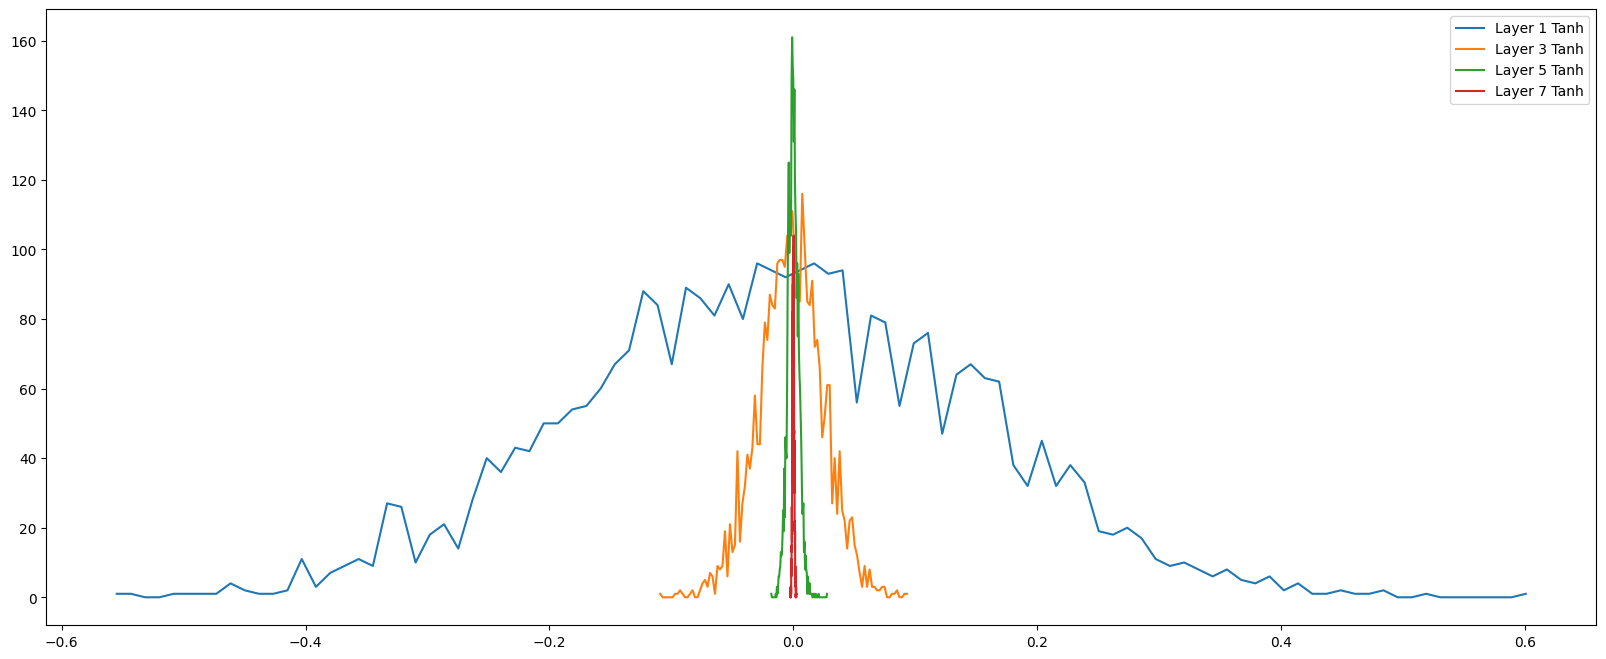

In [69]:
plt.figure(figsize=(20,8))
labels = []
for i, layer in enumerate(layers[:-2]):
    if isinstance(layer, Tanh):
        hy, hx = torch.histogram(layer.out)
        print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
        plt.plot(hx[:-1].detach(), hy.detach())
        labels.append(f'Layer {i} {layer.__class__.__name__}')

plt.legend(labels)


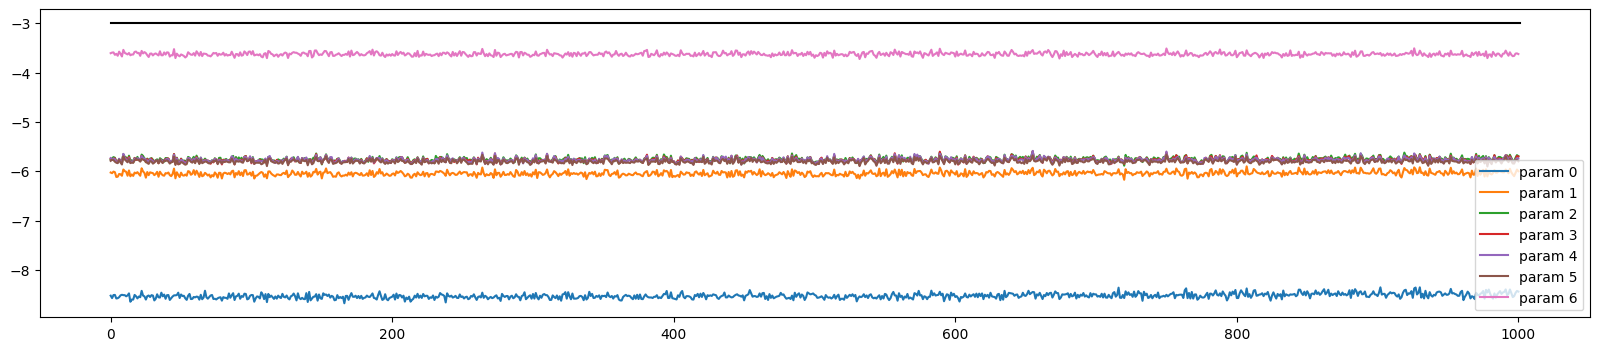

In [70]:
plt.figure(figsize=(20, 4))

legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);
